In [1]:
import pandas as pd
import numpy as np
import statistics

def most_common(row):
    return max(set(row), key=row.count)

def get_seconds(row):
    return row.second

def sort_dt(row):
    return sorted(row)

def get_td_mean(row):
    td = 0
    if len(row) > 2:
        for i in range (0,len(row)-1):
            td += row[i+1]-row[i]
        return td/(len(row)-1)
    else:
        return 0
        
def get_td_sd(row):
    sd = 0
    new_list = []
    if len(row) > 2:
        for i in range (0,len(row)-1):
            new_list.append(row[i+1]-row[i])
        return statistics.stdev(new_list)
    else:
        return 0
        

In [2]:
#Import Data

data = pd.read_csv("Actual-Data/stingar_full-20190523.csv")
data

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,app,command,data,dest_ip,dest_port,dionaea_action,direction,hash,ids_type,...,ssh_version,tags,timestamp,transport,type,url,username,vendor_product,d_time,d_time_window
0,0,dionaea,NaN,NaN,172.18.0.2,1433,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:00.099290,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:00,2019-05-23 03:25:00
1,1,dionaea,NaN,NaN,172.18.0.2,445,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:00.178565,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:00,2019-05-23 03:25:00
2,2,dionaea,NaN,NaN,172.18.0.2,445,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:00.511274,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:00,2019-05-23 03:25:00
3,3,dionaea,NaN,NaN,172.18.0.2,1433,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:01.257961,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:01,2019-05-23 03:25:00
4,4,dionaea,NaN,NaN,172.18.0.2,445,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:01.582025,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:01,2019-05-23 03:25:00
5,5,dionaea,NaN,NaN,172.18.0.2,445,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:01.721635,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:01,2019-05-23 03:25:00
6,6,cowrie,NaN,NaN,172.18.0.2,2223,NaN,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:02.240231,tcp,cowrie.sessions,NaN,NaN,Cowrie,2019-05-23 03:25:02,2019-05-23 03:25:00
7,7,dionaea,NaN,NaN,172.18.0.2,445,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:02.965917,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:02,2019-05-23 03:25:00
8,8,dionaea,NaN,NaN,172.18.0.2,445,accept,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:02.966709,tcp,dionaea.connections,NaN,NaN,Dionaea,2019-05-23 03:25:02,2019-05-23 03:25:00
9,9,cowrie,NaN,NaN,172.18.0.2,2223,NaN,inbound,NaN,network,...,NaN,NaN,2019-05-23T07:25:03.300280,tcp,cowrie.sessions,NaN,NaN,Cowrie,2019-05-23 03:25:03,2019-05-23 03:25:00


In [3]:
data['d_time'] = pd.to_datetime(data['d_time']).values.astype(np.int64)

In [4]:
data_grouped_td = data[['src_ip','d_time']].groupby('src_ip',as_index = False).agg({'d_time':lambda x: x.tolist()})
data_grouped_td['d_time'] = data_grouped_td['d_time'].apply(sort_dt)
data_grouped_td['d_time'] = data_grouped_td['d_time'].apply(get_td_mean)
data_grouped_td['d_time'] = pd.to_datetime(data_grouped_td['d_time'], unit='ns')
data_grouped_td['d_time'] = data_grouped_td['d_time'].apply(get_seconds)
data_grouped_td = data_grouped_td.rename({'d_time':'mean_time_difference'},axis = 1)

In [5]:
data_grouped_sd = data[['src_ip','d_time']].groupby('src_ip',as_index = False).agg({'d_time':lambda x: x.tolist()})
data_grouped_sd['d_time'] = data_grouped_sd['d_time'].apply(sort_dt)
data_grouped_sd['d_time'] = data_grouped_sd['d_time'].apply(get_td_sd)
data_grouped_sd['d_time'] = pd.to_datetime(data_grouped_sd['d_time'], unit='ns')
data_grouped_sd['d_time'] = data_grouped_sd['d_time'].apply(get_seconds)
data_grouped_sd = data_grouped_sd.rename({'d_time':'sd_time_difference'},axis = 1)

In [6]:
data_grouped = data[['src_ip','d_time']].groupby('src_ip',as_index = False).agg({'d_time':np.mean})
data_grouped['d_time'] = pd.to_datetime(data_grouped['d_time'], unit='ns')

In [7]:
data_grouped1 = data[['src_ip','d_time']].groupby('src_ip',as_index = False).agg({'d_time':np.std})
data_grouped1['d_time'] = pd.to_datetime(data_grouped1['d_time'], unit='ns')
data_grouped1['d_time'] = data_grouped1['d_time'].apply(get_seconds)

In [8]:
data_grouped2 = data[['sensor','src_ip']].groupby('src_ip',as_index = False).agg({'sensor':lambda x: x.tolist()})
data_grouped2['most_common_sensor'] = data_grouped2['sensor'].apply(most_common)

In [9]:
data_final = data_grouped.merge(data_grouped1, left_on='src_ip', right_on='src_ip')
data_final = data_final.merge(data_grouped_td,left_on='src_ip', right_on='src_ip')
data_final = data_final.merge(data_grouped_sd,left_on='src_ip', right_on='src_ip')
data_final = data_final.merge(data_grouped2,left_on='src_ip', right_on='src_ip')
data_final = data_final.rename({'d_time_x':'mean_time_of_attack','d_time_y':'sd_time_of_attack','sensor':'all_sensors'},axis = 1)

In [10]:
data_final["all_sensors"].iloc[0]

['49eed2a1-83a4-4968-90cf-1235dd6f88fa',
 '49eed2a1-83a4-4968-90cf-1235dd6f88fa',
 '49eed2a1-83a4-4968-90cf-1235dd6f88fa',
 '49eed2a1-83a4-4968-90cf-1235dd6f88fa']

In [11]:
data_final["sensor_number"] = data_final["all_sensors"].apply(len)
data_final.drop(["mean_time_of_attack", "sd_time_of_attack"], axis = 1)

,src_ip,mean_time_difference,sd_time_difference,all_sensors,most_common_sensor,sensor_number
0,1.0.139.35,41,11,"[49eed2a1-83a4-4968-90cf-1235dd6f88fa, 49eed2a...",49eed2a1-83a4-4968-90cf-1235dd6f88fa,4
1,1.0.157.0,52,17,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4,4
2,1.0.182.29,3,27,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee,3
3,1.0.187.45,1,2,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee,4
4,1.0.190.251,41,11,"[49eed2a1-83a4-4968-90cf-1235dd6f88fa, 49eed2a...",49eed2a1-83a4-4968-90cf-1235dd6f88fa,4
5,1.0.201.216,43,34,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4,8
6,1.0.205.239,41,11,"[fdd6134e-08a7-49d3-90d7-5499916077a4, fdd6134...",fdd6134e-08a7-49d3-90d7-5499916077a4,4
7,1.0.241.191,42,11,"[a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee, a8fed55...",a8fed55b-b5f2-4bbc-b77e-b0feb4d1caee,4
8,1.0.251.143,54,41,"[49797144-df1a-424a-841f-3b3faaf19506, 4979714...",49797144-df1a-424a-841f-3b3faaf19506,13
9,1.1.173.11,0,0,[113abfec-95f0-4fb9-ae48-86a22a4ff7ee],113abfec-95f0-4fb9-ae48-86a22a4ff7ee,1


In [12]:
data_final.drop(["mean_time_of_attack", "sd_time_of_attack", "all_sensors", "most_common_sensor"], axis = 1, inplace= True)

In [13]:
data_final

,src_ip,mean_time_difference,sd_time_difference,sensor_number
0,1.0.139.35,41,11,4
1,1.0.157.0,52,17,4
2,1.0.182.29,3,27,3
3,1.0.187.45,1,2,4
4,1.0.190.251,41,11,4
5,1.0.201.216,43,34,8
6,1.0.205.239,41,11,4
7,1.0.241.191,42,11,4
8,1.0.251.143,54,41,13
9,1.1.173.11,0,0,1


In [14]:
new = data[["ssh_username", "src_ip"]].dropna()
new["length_username"] = new["ssh_username"].apply(len)
user_length = new.groupby("src_ip").mean()

In [15]:
current = pd.merge(user_length, data_final, how = "outer", on = "src_ip")

In [16]:
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number
0,1.100.70.252,6.000000,0,0,2
1,1.109.197.121,3.000000,0,0,2
2,1.158.42.147,5.461165,10,17,284
3,1.170.31.204,5.482587,12,20,281
4,1.179.137.10,5.000000,0,0,2
5,1.229.12.206,2.000000,0,0,4
6,1.232.77.181,2.000000,0,0,4
7,1.34.173.249,5.568627,11,18,71
8,1.60.102.174,5.500000,21,46,4
9,101.251.197.238,2.000000,0,0,2


In [17]:
current['length_username'].fillna(value = current['length_username'].mean(), inplace = True)

In [18]:
new_command = data[['src_ip', 'command']]
new_command.dropna(inplace = True)
new_command['length_command'] = new_command['command'].apply(len) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
feature = new_command.groupby('src_ip').mean()

In [20]:
current = pd.merge(current, feature, how = 'outer', on = "src_ip")

In [21]:
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command
0,1.100.70.252,6.000000,0,0,2,NaN
1,1.109.197.121,3.000000,0,0,2,NaN
2,1.158.42.147,5.461165,10,17,284,NaN
3,1.170.31.204,5.482587,12,20,281,NaN
4,1.179.137.10,5.000000,0,0,2,NaN
5,1.229.12.206,2.000000,0,0,4,NaN
6,1.232.77.181,2.000000,0,0,4,NaN
7,1.34.173.249,5.568627,11,18,71,NaN
8,1.60.102.174,5.500000,21,46,4,NaN
9,101.251.197.238,2.000000,0,0,2,NaN


In [22]:
current['length_command'].fillna(value = current['length_command'].mean(), inplace = True)

In [23]:
data['app'].value_counts()
counts = data['app'].value_counts()
res = data[~data['app'].isin(counts[counts < 27].index)]
res['app'].value_counts()
honeypot = res[['app', 'src_ip']]
honeypot

,app,src_ip
0,dionaea,112.133.244.33
1,dionaea,1.52.125.248
2,dionaea,171.221.41.21
3,dionaea,27.185.177.235
4,dionaea,36.72.215.37
5,dionaea,171.221.41.21
6,cowrie,195.231.5.153
7,dionaea,36.72.215.37
8,dionaea,171.221.41.21
9,cowrie,165.227.75.233


In [24]:
honeypot['app'].value_counts()
honeypot.groupby('src_ip').head()

,app,src_ip
0,dionaea,112.133.244.33
1,dionaea,1.52.125.248
2,dionaea,171.221.41.21
3,dionaea,27.185.177.235
4,dionaea,36.72.215.37
5,dionaea,171.221.41.21
6,cowrie,195.231.5.153
7,dionaea,36.72.215.37
8,dionaea,171.221.41.21
9,cowrie,165.227.75.233


In [25]:
new_current = pd.merge(current, honeypot, how = 'inner', on = 'src_ip')
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command
0,1.100.70.252,6.000000,0,0,2,170.090011
1,1.109.197.121,3.000000,0,0,2,170.090011
2,1.158.42.147,5.461165,10,17,284,170.090011
3,1.170.31.204,5.482587,12,20,281,170.090011
4,1.179.137.10,5.000000,0,0,2,170.090011
5,1.229.12.206,2.000000,0,0,4,170.090011
6,1.232.77.181,2.000000,0,0,4,170.090011
7,1.34.173.249,5.568627,11,18,71,170.090011
8,1.60.102.174,5.500000,21,46,4,170.090011
9,101.251.197.238,2.000000,0,0,2,170.090011


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
dat = data.groupby('src_ip')[['src_ip', 'app']].head()
temp = dat.drop_duplicates()

In [28]:
let = pd.get_dummies(temp['app'])
let.head()

,amun,conpot,cowrie,dionaea,glastopf,rdphoney
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [29]:
det = pd.concat([let,temp], axis = 1)
det['app'].value_counts()
counts = det['app'].value_counts()
det = det[~det['app'].isin(counts[counts < 100].index)]
det['app'].value_counts()

dionaea     15019
cowrie       1381
amun          356
glastopf      237
rdphoney      176
Name: app, dtype: int64

In [30]:
current.columns

Index(['src_ip', 'length_username', 'mean_time_difference',
       'sd_time_difference', 'sensor_number', 'length_command'],
      dtype='object')

In [31]:
current.drop_duplicates('src_ip', inplace = True)

In [32]:
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command
0,1.100.70.252,6.000000,0,0,2,170.090011
1,1.109.197.121,3.000000,0,0,2,170.090011
2,1.158.42.147,5.461165,10,17,284,170.090011
3,1.170.31.204,5.482587,12,20,281,170.090011
4,1.179.137.10,5.000000,0,0,2,170.090011
5,1.229.12.206,2.000000,0,0,4,170.090011
6,1.232.77.181,2.000000,0,0,4,170.090011
7,1.34.173.249,5.568627,11,18,71,170.090011
8,1.60.102.174,5.500000,21,46,4,170.090011
9,101.251.197.238,2.000000,0,0,2,170.090011


In [33]:
head = data.groupby('src_ip').count()
head.head()
head.reset_index(inplace = True)
val = head[['src_ip', 'app']]
val.head()

,src_ip,app
0,1.0.139.35,4
1,1.0.157.0,4
2,1.0.182.29,3
3,1.0.187.45,4
4,1.0.190.251,4


In [34]:
current = pd.merge(current, val, how = 'inner', on = 'src_ip')

In [35]:
current.rename(columns={'app':'daily_frequency'}, inplace=True)

In [36]:
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command,daily_frequency
0,1.100.70.252,6.000000,0,0,2,170.090011,2
1,1.109.197.121,3.000000,0,0,2,170.090011,2
2,1.158.42.147,5.461165,10,17,284,170.090011,284
3,1.170.31.204,5.482587,12,20,281,170.090011,281
4,1.179.137.10,5.000000,0,0,2,170.090011,2
5,1.229.12.206,2.000000,0,0,4,170.090011,4
6,1.232.77.181,2.000000,0,0,4,170.090011,4
7,1.34.173.249,5.568627,11,18,71,170.090011,71
8,1.60.102.174,5.500000,21,46,4,170.090011,4
9,101.251.197.238,2.000000,0,0,2,170.090011,2


In [37]:
new = data[['src_ip', 'ssh_password']]
new.head()

,src_ip,ssh_password
0,112.133.244.33,NaN
1,1.52.125.248,NaN
2,171.221.41.21,NaN
3,27.185.177.235,NaN
4,36.72.215.37,NaN


In [38]:
new_data = data[['src_ip', 'ssh_password']]
new_data.head()
new_data.dropna(inplace = True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
new_data['length_password'] = new_data['ssh_password'].apply(len)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
new_data.drop(['ssh_password'], axis = 1, inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [41]:
new_data.drop_duplicates(inplace= True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
current = pd.merge(current, new_data, how = 'outer', on = 'src_ip')
current['length_password'].fillna(value = current['length_password'].mean(), inplace = True)

In [43]:
current.drop_duplicates(inplace= True)
current.drop_duplicates('src_ip', inplace= True)
current

,src_ip,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command,daily_frequency,length_password
0,1.100.70.252,6.000000,0,0,2,170.090011,2,8.000000
1,1.109.197.121,3.000000,0,0,2,170.090011,2,6.000000
2,1.158.42.147,5.461165,10,17,284,170.090011,284,7.000000
10,1.170.31.204,5.482587,12,20,281,170.090011,281,6.000000
19,1.179.137.10,5.000000,0,0,2,170.090011,2,6.000000
20,1.229.12.206,2.000000,0,0,4,170.090011,4,9.000000
22,1.232.77.181,2.000000,0,0,4,170.090011,4,24.000000
24,1.34.173.249,5.568627,11,18,71,170.090011,71,12.000000
30,1.60.102.174,5.500000,21,46,4,170.090011,4,6.000000
32,101.251.197.238,2.000000,0,0,2,170.090011,2,6.000000


In [44]:
dat_t = data.groupby('src_ip')['dest_port'].nunique()
new_dat_t = dat_t.reset_index()
new_dat_t

,src_ip,dest_port
0,1.0.139.35,1
1,1.0.157.0,1
2,1.0.182.29,1
3,1.0.187.45,1
4,1.0.190.251,1
5,1.0.201.216,1
6,1.0.205.239,1
7,1.0.241.191,1
8,1.0.251.143,1
9,1.1.173.11,1


In [45]:
current = pd.merge(new_dat_t, current, how = 'inner', on = 'src_ip')

In [46]:
current['dest_port'].value_counts()

1     16713
2       230
3        18
5         6
4         5
12        4
9         2
14        1
7         1
6         1
19        1
16        1
Name: dest_port, dtype: int64

In [47]:
current.rename(columns={'dest_port':'dest_port_number'}, inplace=True)

In [48]:
current['length_command'].value_counts()

170.090011    16740
632.000000       60
20.461538        54
6.714286         20
6.857143         18
4.857143         16
7.142857         10
23.000000         2
23.190476         2
24.190476         2
71.292842         1
29.512762         1
29.444706         1
61.304511         1
54.523810         1
22.857143         1
7.666667          1
27.133637         1
101.500000        1
6.661654          1
67.260747         1
25.833260         1
27.868552         1
27.321537         1
24.469332         1
35.583333         1
29.820704         1
6.250000          1
9.714286          1
29.827586         1
              ...  
30.184358         1
31.086957         1
28.692595         1
26.063158         1
20.840000         1
25.342105         1
29.870968         1
28.318182         1
5.600000          1
27.504726         1
6.697674          1
5.333333          1
27.729877         1
74.636719         1
29.766245         1
31.124427         1
32.512195         1
26.468326         1
28.468108         1


In [49]:
current['length_password'].value_counts()

9.560111     16313
6.000000       195
8.000000        96
5.000000        96
4.000000        75
7.000000        69
3.000000        30
9.000000        26
10.000000       19
12.000000       18
11.000000       16
13.000000        6
2.000000         6
1.000000         4
16.000000        4
19.000000        2
24.000000        2
15.000000        1
17.000000        1
61.000000        1
20.000000        1
21.000000        1
22.000000        1
Name: length_password, dtype: int64

In [50]:
current['length_username'].value_counts()

6.503028     16312
6.000000        97
5.000000        89
5.756098        43
7.000000        40
4.000000        39
2.000000        32
3.000000        31
5.500000        23
8.000000        22
5.333333        13
6.500000        12
9.000000        12
5.666667        10
10.000000        7
4.500000         7
22.555556        6
23.000000        6
5.444444         4
5.300000         4
5.250000         4
22.888889        3
23.666667        3
6.200000         3
19.666667        3
4.333333         3
5.555556         3
7.333333         3
23.555556        3
7.500000         3
             ...  
6.069231         1
6.222222         1
4.395833         1
5.875000         1
6.243243         1
5.047619         1
5.437500         1
5.640000         1
6.166667         1
9.500000         1
13.000000        1
20.000000        1
5.869565         1
5.340000         1
5.416667         1
5.466667         1
4.888889         1
6.066667         1
5.068063         1
5.854167         1
22.111111        1
4.125000    

In [51]:
current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16983 entries, 0 to 16982
Data columns (total 9 columns):
src_ip                  16983 non-null object
dest_port_number        16983 non-null int64
length_username         16983 non-null float64
mean_time_difference    16983 non-null int64
sd_time_difference      16983 non-null int64
sensor_number           16983 non-null int64
length_command          16983 non-null float64
daily_frequency         16983 non-null int64
length_password         16983 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.3+ MB


In [52]:
new_frame = data[['src_ip', 'signature']]
new_frame.info()
new_frame['signature'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477041 entries, 0 to 1477040
Data columns (total 2 columns):
src_ip       1477027 non-null object
signature    1477041 non-null object
dtypes: object(2)
memory usage: 22.5+ MB


command attempted on cowrie honeypot            609552
SSH session on cowrie honeypot                  249780
Connection to Honeypot                          215507
SSH login attempted on cowrie honeypot          188632
URL download attempted on cowrie honeypot        81150
File downloaded on cowrie honeypot               77119
unknown command attempted on cowrie honeypot     55301
Name: signature, dtype: int64

In [53]:
new_frame.drop_duplicates(subset = "src_ip",inplace = True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
current_df = pd.merge(current, new_frame, on = 'src_ip', how = 'inner')
current_df.info()
dummy = pd.get_dummies(current_df['signature'], drop_first = True)
cur = pd.concat([current_df,dummy], axis = 1)
cur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16983 entries, 0 to 16982
Data columns (total 10 columns):
src_ip                  16983 non-null object
dest_port_number        16983 non-null int64
length_username         16983 non-null float64
mean_time_difference    16983 non-null int64
sd_time_difference      16983 non-null int64
sensor_number           16983 non-null int64
length_command          16983 non-null float64
daily_frequency         16983 non-null int64
length_password         16983 non-null float64
signature               16983 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16983 entries, 0 to 16982
Data columns (total 12 columns):
src_ip                                  16983 non-null object
dest_port_number                        16983 non-null int64
length_username                         16983 non-null float64
mean_time_difference                    16983 non-null int64
sd_time_differe

In [64]:
cur.drop(['SSH session on cowrie honeypot'], axis = 1, inplace = True)

In [91]:
honeypot['app'].value_counts()
honeypot.drop_duplicates(subset = 'src_ip', inplace= True)
honeypot['app'].value_counts()
cur

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,src_ip,dest_port_number,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command,daily_frequency,length_password
0,1.0.139.35,1,6.503028,41,11,4,170.090011,4,9.560111
1,1.0.157.0,1,6.503028,52,17,4,170.090011,4,9.560111
2,1.0.182.29,1,6.503028,3,27,3,170.090011,3,9.560111
3,1.0.187.45,1,6.503028,1,2,4,170.090011,4,9.560111
4,1.0.190.251,1,6.503028,41,11,4,170.090011,4,9.560111
5,1.0.201.216,1,6.503028,43,34,8,170.090011,8,9.560111
6,1.0.205.239,1,6.503028,41,11,4,170.090011,4,9.560111
7,1.0.241.191,1,6.503028,42,11,4,170.090011,4,9.560111
8,1.0.251.143,1,6.503028,54,41,13,170.090011,13,9.560111
9,1.1.173.11,1,6.503028,0,0,1,170.090011,1,9.560111


In [93]:
new_curr = pd.merge(cur, honeypot, on = 'src_ip', how = 'inner')
new_curr

,src_ip,dest_port_number,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command,daily_frequency,length_password,app
0,1.0.139.35,1,6.503028,41,11,4,170.090011,4,9.560111,dionaea
1,1.0.157.0,1,6.503028,52,17,4,170.090011,4,9.560111,dionaea
2,1.0.182.29,1,6.503028,3,27,3,170.090011,3,9.560111,dionaea
3,1.0.187.45,1,6.503028,1,2,4,170.090011,4,9.560111,dionaea
4,1.0.190.251,1,6.503028,41,11,4,170.090011,4,9.560111,dionaea
5,1.0.201.216,1,6.503028,43,34,8,170.090011,8,9.560111,dionaea
6,1.0.205.239,1,6.503028,41,11,4,170.090011,4,9.560111,dionaea
7,1.0.241.191,1,6.503028,42,11,4,170.090011,4,9.560111,dionaea
8,1.0.251.143,1,6.503028,54,41,13,170.090011,13,9.560111,dionaea
9,1.1.173.11,1,6.503028,0,0,1,170.090011,1,9.560111,rdphoney


Clustering Algorithm
=================

K-Means Algorithm
-----------------------

The k-means algorithm belongs to the category of prototype-based clustering.
Prototype-based clustering means that each cluster is represented by a prototype, which can either be the centroid (average) of similar points with continuous features, or the medoid (the most representative or most frequently occurring point) in the case of categorical features.
While k-means is very good at identifying clusters with a spherical shape, one of the drawbacks of this clustering algorithm is that we have to specify the number of clusters, k, a priori. 

In [99]:
target = new_curr['app']
target.value_counts()

dionaea     14973
cowrie       1347
amun          307
glastopf      227
rdphoney      107
conpot         22
Name: app, dtype: int64

In [130]:
features = new_curr.drop(['app'], axis = 1)
features = new_curr.drop(['src_ip'], axis = 1)

In [138]:
features

,dest_port_number,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command,daily_frequency,length_password,app
0,1,6.503028,41,11,4,170.090011,4,9.560111,dionaea
1,1,6.503028,52,17,4,170.090011,4,9.560111,dionaea
2,1,6.503028,3,27,3,170.090011,3,9.560111,dionaea
3,1,6.503028,1,2,4,170.090011,4,9.560111,dionaea
4,1,6.503028,41,11,4,170.090011,4,9.560111,dionaea
5,1,6.503028,43,34,8,170.090011,8,9.560111,dionaea
6,1,6.503028,41,11,4,170.090011,4,9.560111,dionaea
7,1,6.503028,42,11,4,170.090011,4,9.560111,dionaea
8,1,6.503028,54,41,13,170.090011,13,9.560111,dionaea
9,1,6.503028,0,0,1,170.090011,1,9.560111,rdphoney


[Text(0, 0.5, 'Length of Password'), Text(0.5, 0, 'Length of Username')]

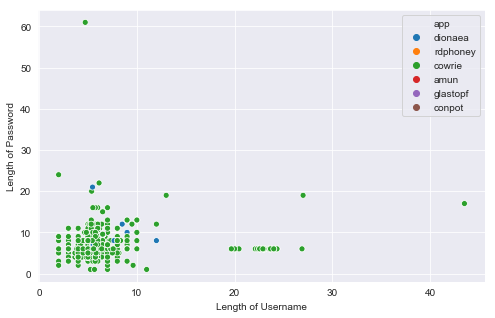

In [157]:
fig, axes = plt.subplots(1, 1, figsize = (8,5))
sns.scatterplot('length_username', 'length_password', hue = 'app', data = features)
axes.set(xlabel='Length of Username', ylabel='Length of Password')

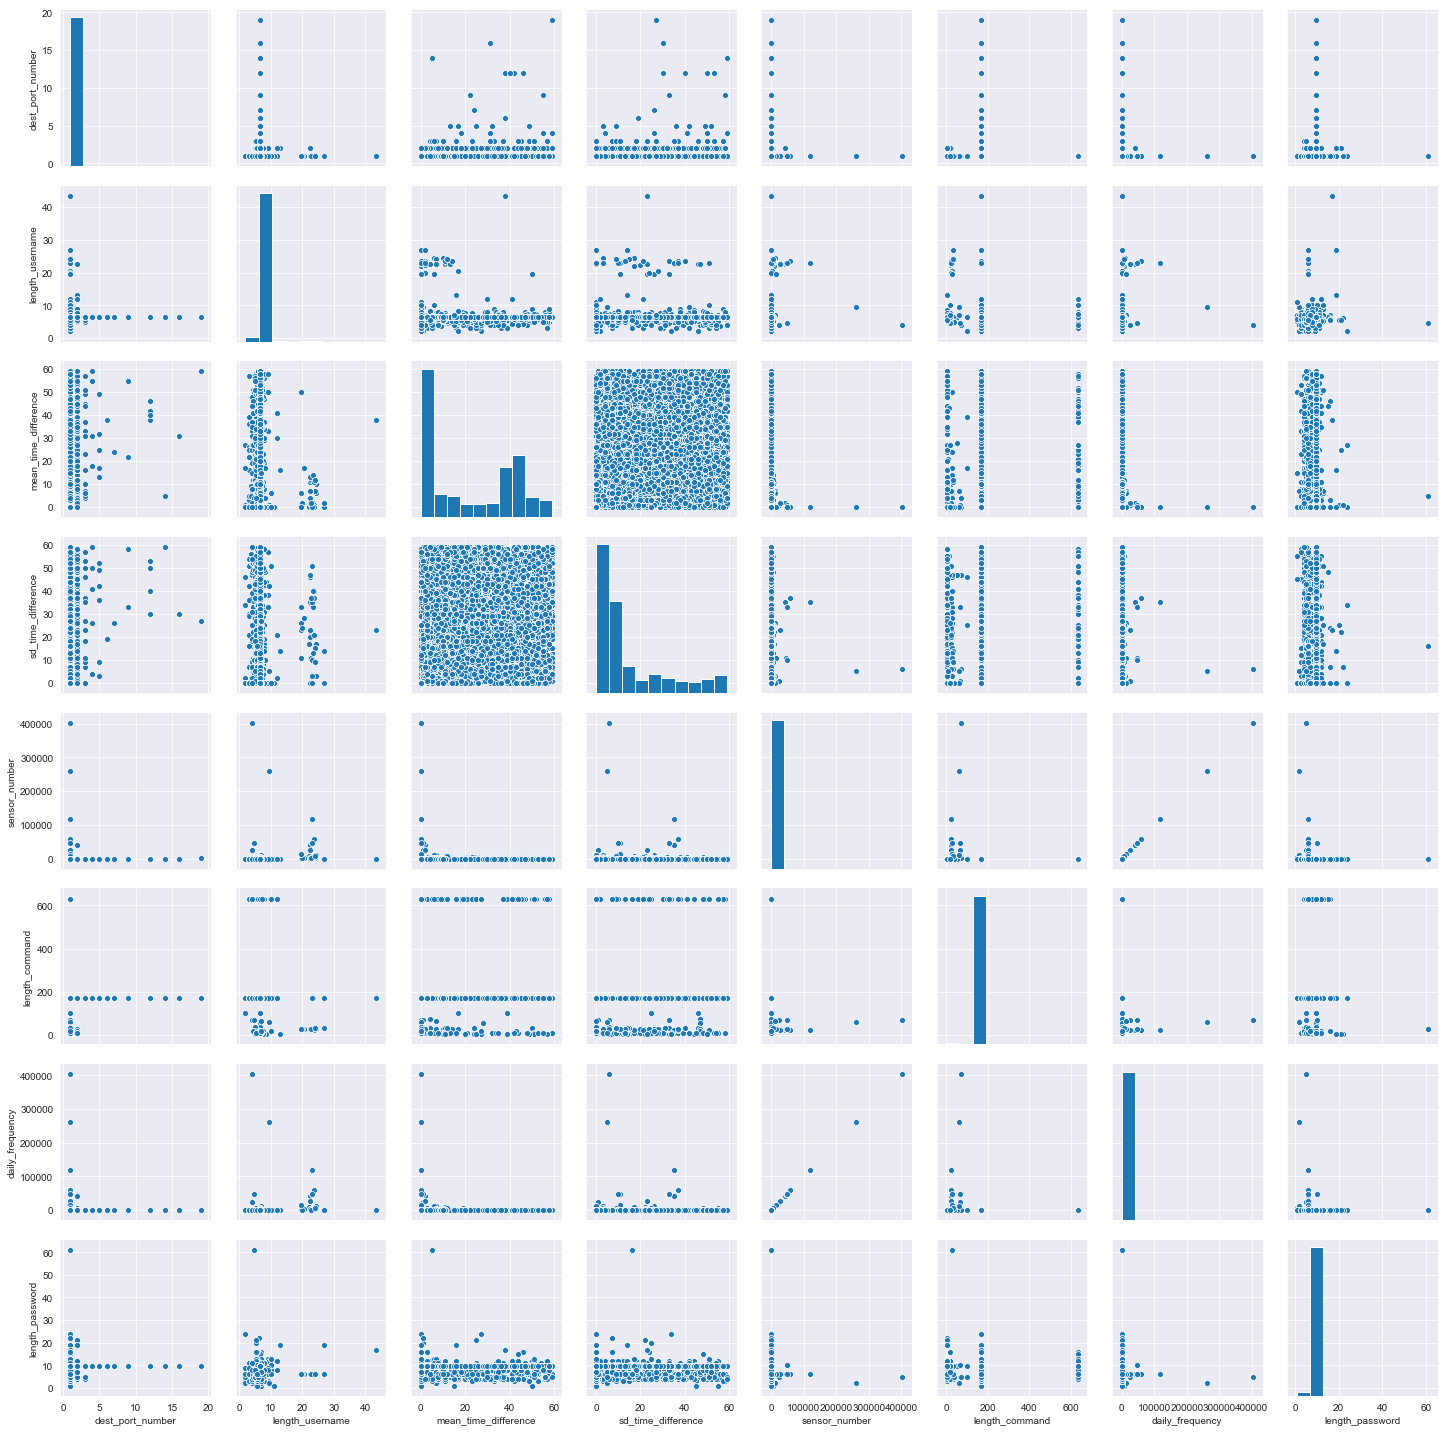

In [166]:
sns.pairplot(features.drop(['app'], axis = 1))

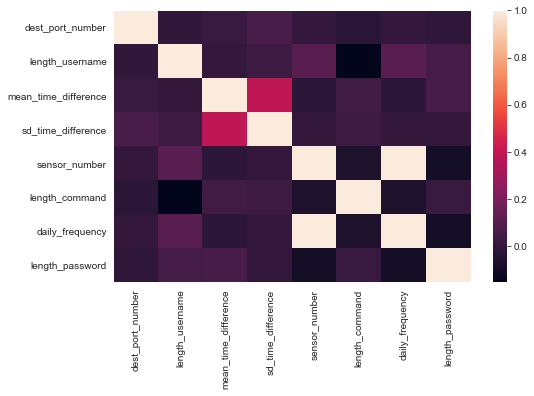

In [168]:
fig, axes = plt.subplots(1, 1, figsize = (8,5))
sns.heatmap(features.drop(['app'], axis = 1).corr())

In [193]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler

dat = features.drop(['app'], axis = 1)
kmeans = KMeans(n_clusters = 3)
kmeans.fit(dat)
y_kmeans = kmeans.predict(dat)
centroids = kmeans.cluster_centers_

In [184]:
centroids

array([[1.02480118e+00, 6.49822861e+00, 2.17420913e+01, 1.43734904e+01,
        2.67572901e+01, 1.70150742e+02, 2.67572901e+01, 9.45001964e+00],
       [1.00000000e+00, 4.00921523e+00, 0.00000000e+00, 6.00000000e+00,
        4.02840000e+05, 7.12928425e+01, 4.02840000e+05, 5.00000000e+00],
       [1.00000000e+00, 9.61567745e+00, 0.00000000e+00, 5.00000000e+00,
        2.60651000e+05, 6.13045105e+01, 2.60651000e+05, 2.00000000e+00],
       [1.16666667e+00, 1.99792630e+01, 5.00000000e-01, 2.68333333e+01,
        5.98885000e+04, 3.28714413e+01, 5.98885000e+04, 6.66666667e+00]])

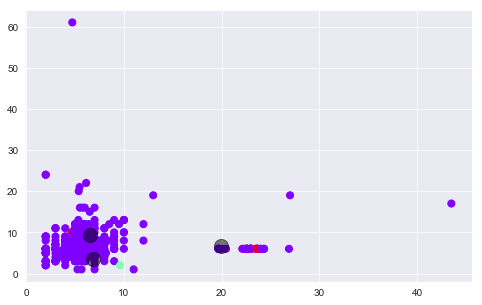

In [195]:
fig, axes = plt.subplots(1, 1, figsize = (8,5))
plt.scatter(dat.iloc[:, 1], dat.iloc[:, 7], c = y_kmeans, s = 50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 7], c='black', s=200, alpha=0.5);

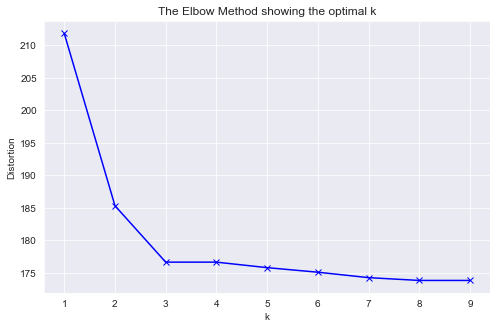

In [197]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dat)
    kmeanModel.fit(dat)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dat.shape[0])

# Plot the elbow
fig, axes = plt.subplots(1,1, figsize = (8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

K-Neighbourhood
---------------------


The KNN algorithm assumes that similar things exist in close proximity The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
          ... 
1477011    NaN
1477012    NaN
1477013    NaN
1477014    NaN
1477015    NaN
1477016    NaN
1477017    NaN
1477018    NaN
1477019    NaN
1477020    NaN
1477021    NaN
1477022    NaN
1477023    NaN
1477024    NaN
1477025    NaN
1477026    NaN
1477027    NaN
1477028    NaN
1477029    NaN
1477030    NaN
1477031    NaN
1477032    NaN
1477033    NaN
1477034    NaN
1477035    NaN
1477036    NaN
1477037    NaN
1477038    NaN
1477039    NaN
1477040    NaN
Name: tags, Length: 1477041, dtype: object

In [200]:
features['app'].value_counts()

dionaea     14973
cowrie       1347
amun          307
glastopf      227
rdphoney      107
conpot         22
Name: app, dtype: int64

In [222]:
count_t = new_curr['app'].value_counts()
result = new_curr[~new_curr['app'].isin(counts[counts < 1000].index)]
result['app'].value_counts()
result

,src_ip,dest_port_number,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command,daily_frequency,length_password,app
0,1.0.139.35,1,6.503028,41,11,4,170.090011,4,9.560111,dionaea
1,1.0.157.0,1,6.503028,52,17,4,170.090011,4,9.560111,dionaea
2,1.0.182.29,1,6.503028,3,27,3,170.090011,3,9.560111,dionaea
3,1.0.187.45,1,6.503028,1,2,4,170.090011,4,9.560111,dionaea
4,1.0.190.251,1,6.503028,41,11,4,170.090011,4,9.560111,dionaea
5,1.0.201.216,1,6.503028,43,34,8,170.090011,8,9.560111,dionaea
6,1.0.205.239,1,6.503028,41,11,4,170.090011,4,9.560111,dionaea
7,1.0.241.191,1,6.503028,42,11,4,170.090011,4,9.560111,dionaea
8,1.0.251.143,1,6.503028,54,41,13,170.090011,13,9.560111,dionaea
10,1.1.174.91,1,6.503028,48,59,5,170.090011,5,9.560111,dionaea


In [231]:
dummy = pd.get_dummies(data = result, columns = ['app'], drop_first = True)
dummy.drop(['src_ip'], axis =1 , inplace = True)
dummy

,dest_port_number,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command,daily_frequency,length_password,app_dionaea
0,1,6.503028,41,11,4,170.090011,4,9.560111,1
1,1,6.503028,52,17,4,170.090011,4,9.560111,1
2,1,6.503028,3,27,3,170.090011,3,9.560111,1
3,1,6.503028,1,2,4,170.090011,4,9.560111,1
4,1,6.503028,41,11,4,170.090011,4,9.560111,1
5,1,6.503028,43,34,8,170.090011,8,9.560111,1
6,1,6.503028,41,11,4,170.090011,4,9.560111,1
7,1,6.503028,42,11,4,170.090011,4,9.560111,1
8,1,6.503028,54,41,13,170.090011,13,9.560111,1
10,1,6.503028,48,59,5,170.090011,5,9.560111,1


In [233]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dummy.drop(['app_dionaea'], axis =1))
scaled_features = scaler.transform(dummy.drop(['app_dionaea'], axis =1))
df_feat = pd.DataFrame(scaled_features,columns = dummy.columns[:-1])
df_feat.head()

,dest_port_number,length_username,mean_time_difference,sd_time_difference,sensor_number,length_command,daily_frequency,length_password
0,-0.071312,-2.962006e-15,0.928301,-0.208555,-0.021572,0.0,-0.021572,0.128902
1,-0.071312,-2.962006e-15,1.471858,0.144566,-0.021572,0.0,-0.021572,0.128902
2,-0.071312,-2.962006e-15,-0.949441,0.733101,-0.021823,0.0,-0.021823,0.128902
3,-0.071312,-2.962006e-15,-1.048270,-0.738236,-0.021572,0.0,-0.021572,0.128902
4,-0.071312,-2.962006e-15,0.928301,-0.208555,-0.021572,0.0,-0.021572,0.128902


In [234]:
df_feat['length_command'].value_counts()

 0.000000     16077
 14.293167       60
-4.630047        54
-5.055436        20
-5.051016        18
-5.112903        16
-5.042175        10
-4.551497         2
-4.514660         2
-4.545603         2
-4.444175         1
-2.161103         1
-3.057142         1
-4.412105         1
-4.456712         1
-4.338885         1
-4.382294         1
-4.257156         1
-4.400847         1
-4.423588         1
-4.118287         1
-5.098168         1
-3.169011         1
-5.046595         1
-4.618336         1
-4.405138         1
-3.181910         1
-5.015652         1
-3.301986         1
-3.366217         1
              ...  
-2.953670         1
-4.162124         1
-4.340440         1
-5.111684         1
-4.962606         1
-5.102294         1
-4.768103         1
-4.555918         1
-4.266754         1
-4.349969         1
-4.341294         1
-4.780480         1
-4.506031         1
-3.576037         1
-4.417773         1
-4.284022         1
-4.301258         1
-5.089916         1
-5.077539         1


In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,dummy['app_dionaea'],
                                                    test_size=0.40)

In [236]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [237]:
pred = knn.predict(X_test)

In [238]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[ 291  253]
 [  39 5945]]


In [239]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.53      0.67       544
           1       0.96      0.99      0.98      5984

    accuracy                           0.96      6528
   macro avg       0.92      0.76      0.82      6528
weighted avg       0.95      0.96      0.95      6528



Text(0, 0.5, 'Error Rate')

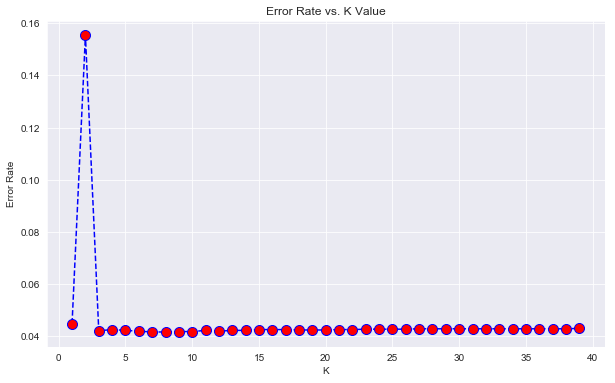

In [240]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [242]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.51      0.67       544
           1       0.96      1.00      0.98      5984

    accuracy                           0.96      6528
   macro avg       0.96      0.76      0.82      6528
weighted avg       0.96      0.96      0.95      6528

